In [22]:
import pandas as pd

df = pd.read_csv('E:\\C\数据工程\\github_bot_processed_data.csv')

pd.options.display.max_rows = 20  # 设置最大显示行数
pd.options.display.max_columns = 15  # 设置最大显示列数
pd.options.display.width = 200  # 设置显示宽度

print(df.head())  # 查看前几行数据
print(df.tail())  # 查看后几行数据

   label  type  site_admin  company   blog  location  hireable                                                bio  public_repos  public_gists  followers  following                 created_at  \
0  Human  True       False    False  False     False     False                                                NaN            26             1          5          1  2011-09-26 17:27:03+00:00   
1  Human  True       False    False   True     False      True  I just press the buttons randomly, and the pro...            30             3          9          6  2015-06-29 10:12:46+00:00   
2  Human  True       False     True   True      True      True         Time is unimportant,\nonly life important.           103            49       1212        221  2008-08-29 16:20:03+00:00   
3    Bot  True       False    False  False      True     False                                                NaN            49             0         84          2  2014-05-20 18:43:09+00:00   
4  Human  True       False    

In [23]:
import pandas as pd

df = pd.read_csv('E:\\C\数据工程\\github_bot_processed_data.csv')

print(df.head())

print(df.info())

print(df.describe())

   label  type  site_admin  company   blog  location  hireable                                                bio  public_repos  public_gists  followers  following                 created_at  \
0  Human  True       False    False  False     False     False                                                NaN            26             1          5          1  2011-09-26 17:27:03+00:00   
1  Human  True       False    False   True     False      True  I just press the buttons randomly, and the pro...            30             3          9          6  2015-06-29 10:12:46+00:00   
2  Human  True       False     True   True      True      True         Time is unimportant,\nonly life important.           103            49       1212        221  2008-08-29 16:20:03+00:00   
3    Bot  True       False    False  False      True     False                                                NaN            49             0         84          2  2014-05-20 18:43:09+00:00   
4  Human  True       False    

1.head() 方法显示的是数据的前几行，可以直接看到数据是什么样的。
2.info() 方法提供的是数据的结构信息，包括数据类型和非空值数量，可以帮助了解数据的整体构成。

In [4]:
import pandas as pd
from datetime import datetime

df = pd.read_csv('E:\\C\数据工程\\github_bot_processed_data.csv')

# 格式化日期列
df['created_at'] = pd.to_datetime(df['created_at']).dt.strftime('%Y-%m-%d %H:%M:%S')
df['updated_at'] = pd.to_datetime(df['updated_at']).dt.strftime('%Y-%m-%d %H:%M:%S')

#格式化整数列为货币格式
currency_columns = ['public_repos', 'public_gists', 'followers', 'following', 'text_bot_count']
for col in currency_columns:
    df[col] = df[col].apply(lambda x: f'{x:,}')  # 添加千位分隔符

print(df)

       label  type  site_admin  company   blog  location  hireable                                                bio public_repos public_gists followers following           created_at  \
0      Human  True       False    False  False     False     False                                                NaN           26            1         5         1  2011-09-26 17:27:03   
1      Human  True       False    False   True     False      True  I just press the buttons randomly, and the pro...           30            3         9         6  2015-06-29 10:12:46   
2      Human  True       False     True   True      True      True         Time is unimportant,\nonly life important.          103           49     1,212       221  2008-08-29 16:20:03   
3        Bot  True       False    False  False      True     False                                                NaN           49            0        84         2  2014-05-20 18:43:09   
4      Human  True       False    False  False     False    

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('E:\\C\数据工程\\github_bot_processed_data.csv')
# 添加一个小的常数以避免对数值为零或负的情况
epsilon = 1

df['public_repos_log'] = np.log1p(df['public_repos'])
df['public_gists_log'] = np.log1p(df['public_gists'])
df['followers_log'] = np.log1p(df['followers'])
df['following_log'] = np.log1p(df['following'])
print(df['public_repos_log'],df['public_gists_log'],df['followers_log'],df['following_log'])

0        3.295837
1        3.433987
2        4.644391
3        3.912023
4        2.484907
           ...   
19763    3.610918
19764    2.833213
19765    2.639057
19766    2.079442
19767    2.397895
Name: public_repos_log, Length: 19768, dtype: float64 0        0.693147
1        1.386294
2        3.912023
3        0.000000
4        0.693147
           ...   
19763    2.833213
19764    0.000000
19765    0.000000
19766    0.000000
19767    0.000000
Name: public_gists_log, Length: 19768, dtype: float64 0        1.791759
1        2.302585
2        7.100852
3        4.442651
4        1.945910
           ...   
19763    2.484907
19764    1.386294
19765    2.397895
19766    1.098612
19767    0.693147
Name: followers_log, Length: 19768, dtype: float64 0        0.693147
1        1.945910
2        5.402677
3        1.098612
4        1.098612
           ...   
19763    1.609438
19764    0.000000
19765    0.693147
19766    0.000000
19767    0.000000
Name: following_log, Length: 19768, dtype: float6

对数变换通常能够减少数据的偏度

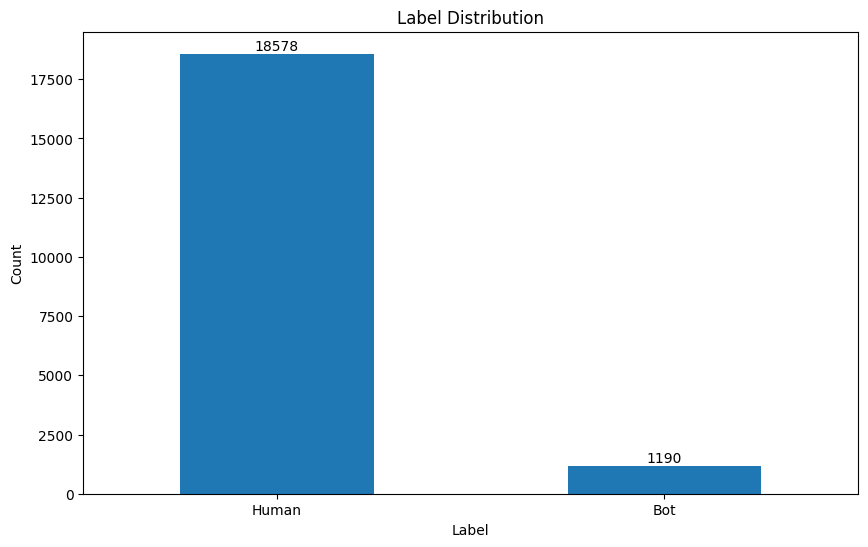

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('E:\\C\\数据工程\\github_bot_processed_data.csv')

label_counts = df['label'].value_counts()

# 绘制条形图
plt.figure(figsize=(10, 6))  
label_counts.plot(kind='bar')  
plt.title('Label Distribution')  
plt.xlabel('Label')  
plt.ylabel('Count')  
plt.xticks(rotation=0)  
# 显示条形图上的数值
for index, value in enumerate(label_counts):
    plt.text(index, value + 0.5, str(value), ha='center', va='bottom')
plt.show()  # 显示图表

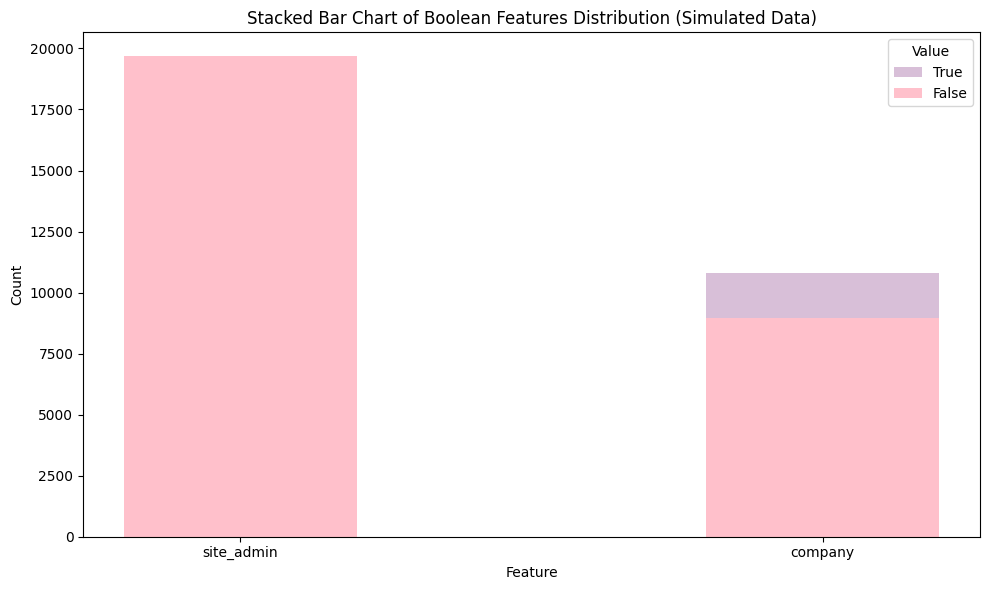

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('E:\\C\数据工程\\github_bot_processed_data.csv')

boolean_features = ['site_admin', 'company']

# 计算每个特征的“True”和“False”数量，并使用melt函数重塑数据
melted_df = df[boolean_features].melt(var_name='Feature', value_name='Value')
value_counts = melted_df.groupby(['Feature', 'Value']).size().unstack(fill_value=0)

# 准备堆积柱状图的数据
stacked_data = []
for feature in boolean_features:
    true_count = value_counts.loc[feature, True]
    false_count = value_counts.loc[feature, False]
    stacked_data.append({
        'Feature': feature,
        'True_Count': true_count,
        'False_Count': false_count,
    })
stacked_df = pd.DataFrame(stacked_data)

# 为了堆积图，我们需要一个连续的x轴位置和一个跟踪每个柱子当前高度的数组
x_positions = np.arange(len(stacked_df))
bottom = np.zeros(len(stacked_df))

# 绘制堆积柱状图
fig, ax = plt.subplots(figsize=(10, 6))
bar_width = 0.4  # 柱子的宽度

for idx, row in stacked_df.iterrows():
    true_height = row['True_Count']
    false_height = row['False_Count']
    
    # 绘制True部分
    ax.bar(x_positions[idx], true_height, bar_width, bottom=bottom[idx], label='True' if idx == 0 else None, color='#D8BFD8')
    
    # 更新底部高度以添加False部分
    bottom[idx] += true_height
    
    # 绘制False部分
    ax.bar(x_positions[idx], false_height, bar_width, bottom=bottom[idx] - true_height, label='False' if idx == 0 else None, color='#FFC0CB')

# 设置x轴标签
ax.set_xticks(x_positions)
ax.set_xticklabels(stacked_df['Feature'])

# 设置图表标题和轴标签
ax.set_title('Stacked Bar Chart of Boolean Features Distribution (Simulated Data)')
ax.set_xlabel('Feature')
ax.set_ylabel('Count')
ax.legend(title='Value')

# 显示图表
plt.tight_layout()
plt.show()

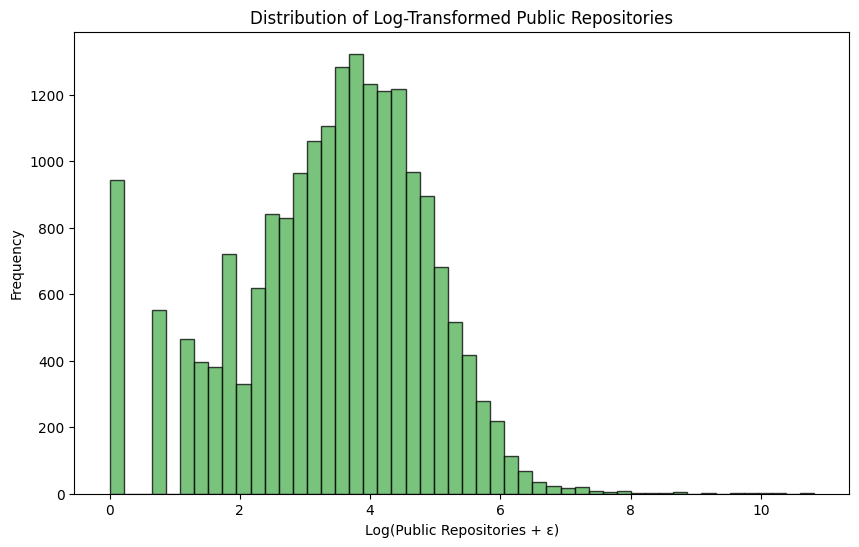

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv('E:\\C\数据工程\\github_bot_processed_data.csv')

epsilon = 1

df['log_public_repos'] = np.log1p(df['public_repos'])

# 绘制直方图
plt.figure(figsize=(10, 6))
plt.hist(df['log_public_repos'], bins=50, alpha=0.75, color='#4CAF50', edgecolor='black')

# 设置图表标题和轴标签
plt.title('Distribution of Log-Transformed Public Repositories')
plt.xlabel('Log(Public Repositories + ε)')
plt.ylabel('Frequency')

# 显示图表
plt.show()

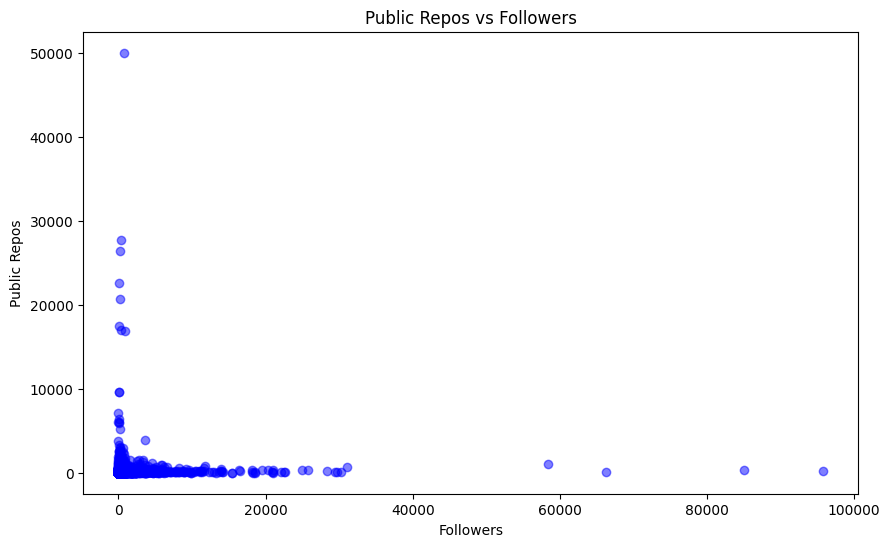

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# 将数据转换为 DataFrame
df = pd.read_csv('E:\\C\数据工程\\github_bot_processed_data.csv')

# 绘制散点图
plt.figure(figsize=(10, 6))
plt.scatter(df['followers'], df['public_repos'], color='blue', alpha=0.5)

# 添加标题和标签
plt.title('Public Repos vs Followers')
plt.xlabel('Followers')
plt.ylabel('Public Repos')

# 显示图形
plt.show()

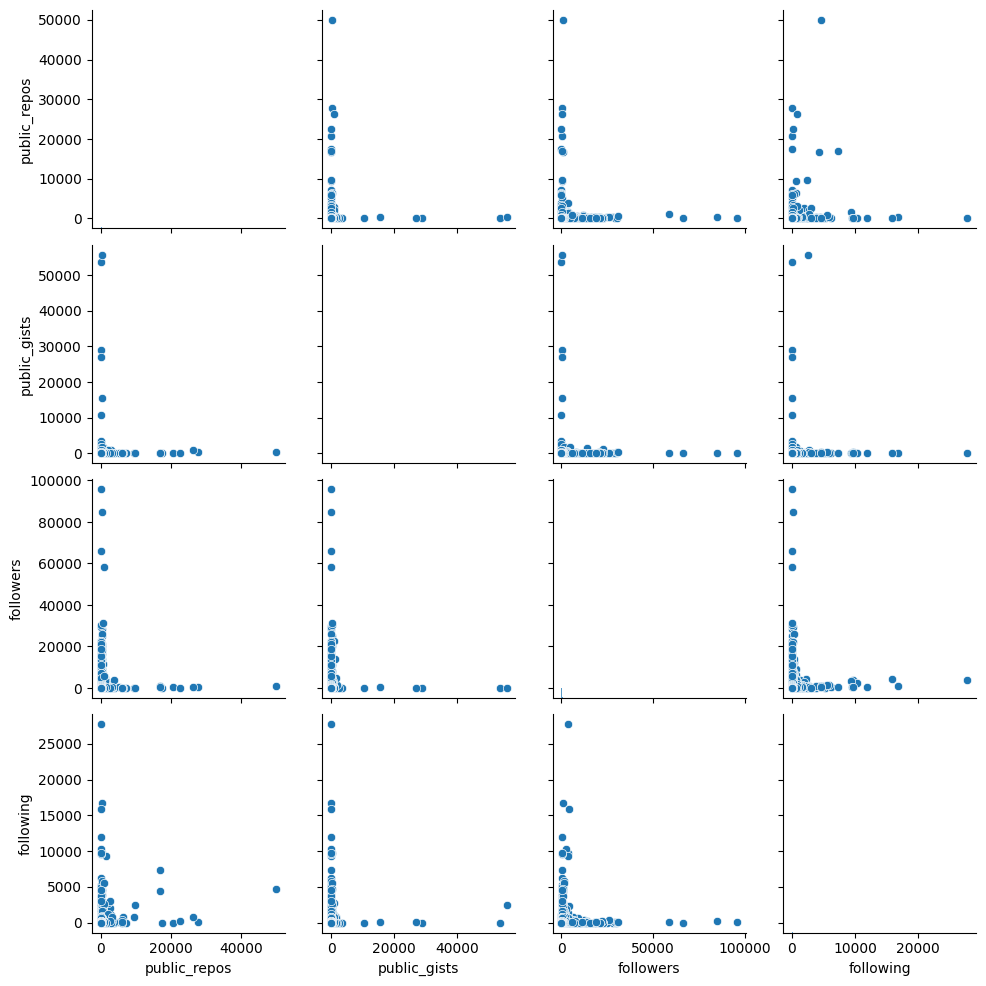

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('E:\\C\数据工程\\github_bot_processed_data.csv')
df.replace([np.inf, -np.inf], np.nan, inplace=True)

numeric_features = ['public_repos', 'public_gists', 'followers', 'following'].copy()

# 使用 seaborn 的 pairplot 函数绘制散点矩阵
sns.pairplot(df[numeric_features])

# 显示图形
plt.show()

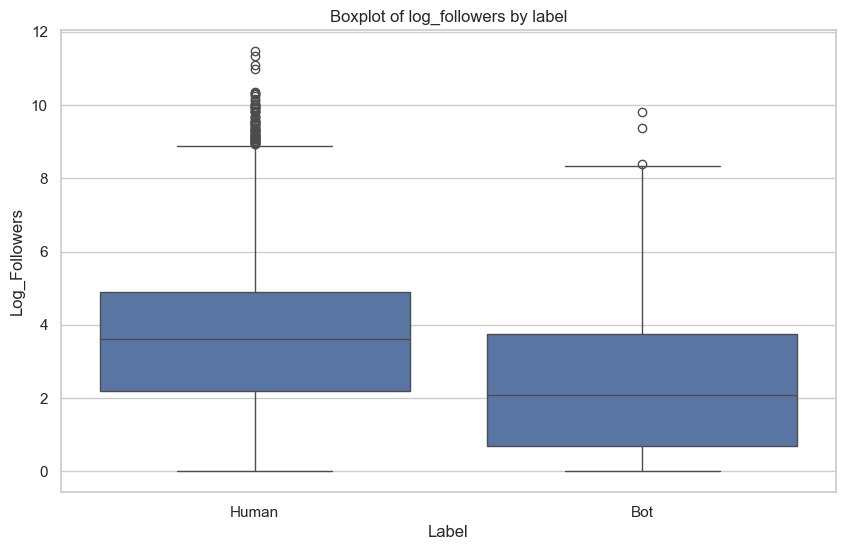

In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


df = pd.read_csv('E:\\C\数据工程\\github_bot_processed_data.csv')

epsilon = 1
df['log_followers'] = np.log1p(df['followers'])

sns.set(style="whitegrid")

# 使用 Seaborn 的 boxplot 函数绘制箱线图
plt.figure(figsize=(10, 6))
sns.boxplot(x='label', y='log_followers', data=df)

plt.title('Boxplot of log_followers by label')
plt.xlabel('Label')
plt.ylabel('Log_Followers')

# 显示图形
plt.show()

<Figure size 1200x1000 with 0 Axes>

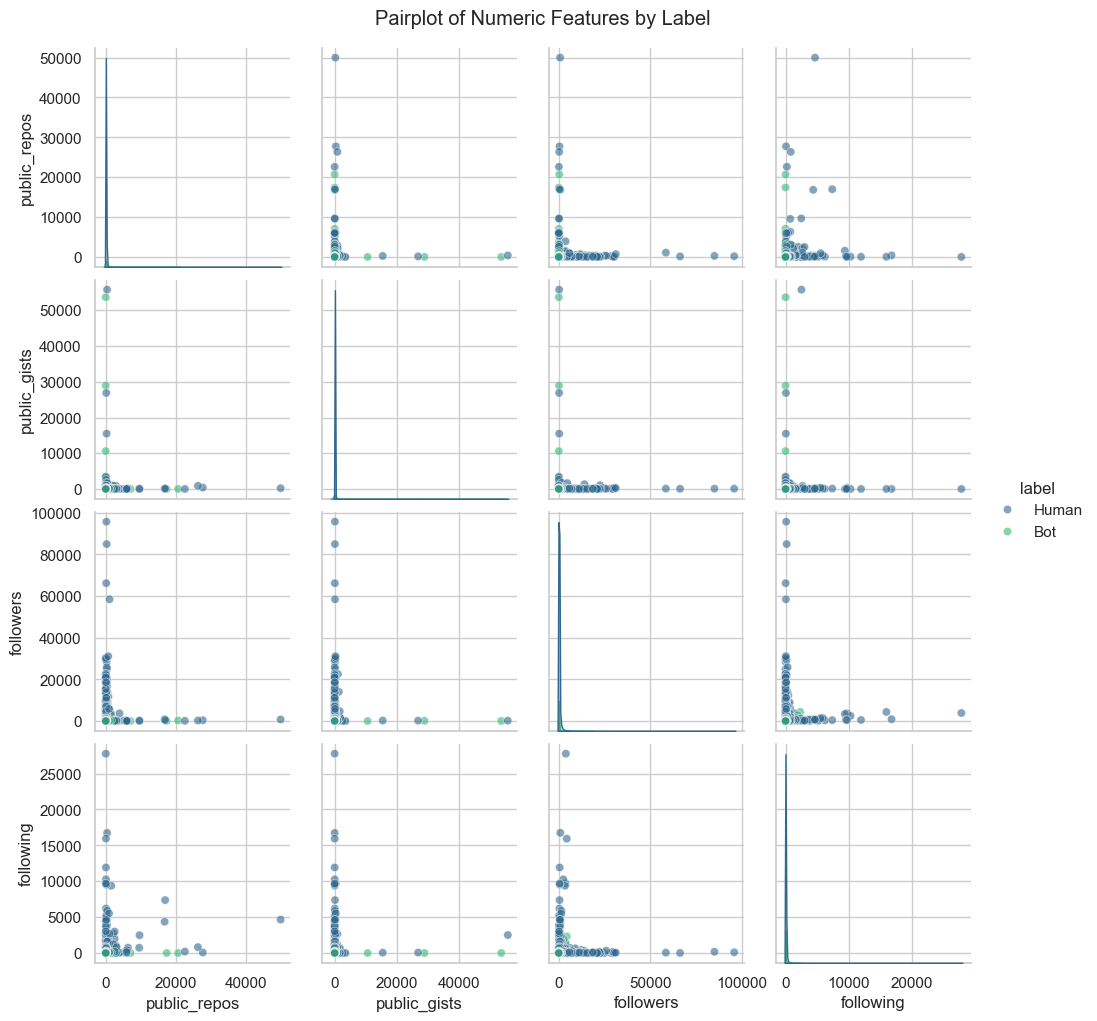

In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
 

df = pd.read_csv('E:\\C\\数据工程\\github_bot_processed_data.csv')

numeric_features = ['public_repos', 'public_gists', 'followers', 'following']

# 绘制成对图，并根据 label 着色
plt.figure(figsize=(12, 10)) 
sns.pairplot(df[numeric_features + ['label']], hue='label', palette='viridis', plot_kws={'alpha': 0.6})

# 添加标题
plt.suptitle('Pairplot of Numeric Features by Label', y=1.02)

# 显示图形
plt.show()

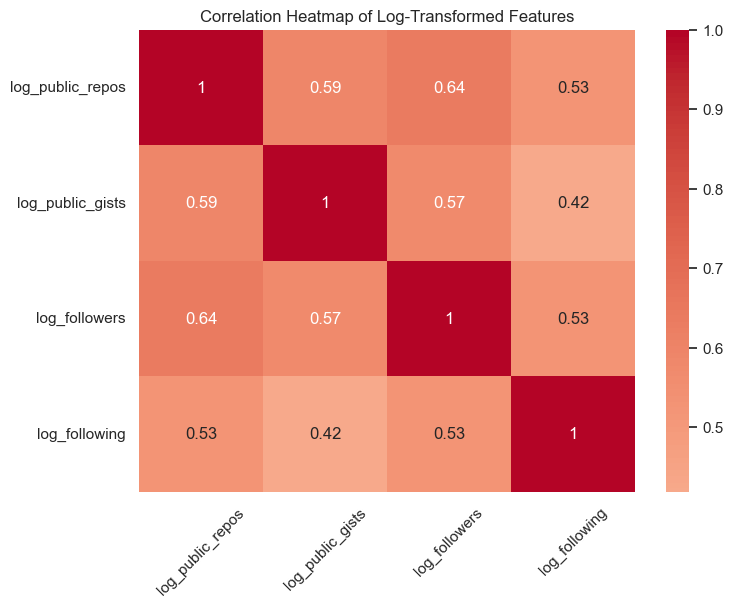

In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('E:\\C\数据工程\\github_bot_processed_data.csv')

df['log_public_repos'] = np.log1p(df['public_repos'])
df['log_public_gists'] = np.log1p(df['public_gists'])
df['log_followers'] = np.log1p(df['followers'])
df['log_following'] = np.log1p(df['following'])

# 计算这些特征之间的相关系数矩阵
correlation_matrix = df[['log_public_repos', 'log_public_gists', 'log_followers', 'log_following']].corr()

# 绘制热图
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)

# 添加标题和标签
plt.title('Correlation Heatmap of Log-Transformed Features')
plt.xticks(rotation=45)  
plt.yticks(rotation=0)   

# 显示图形
plt.show()

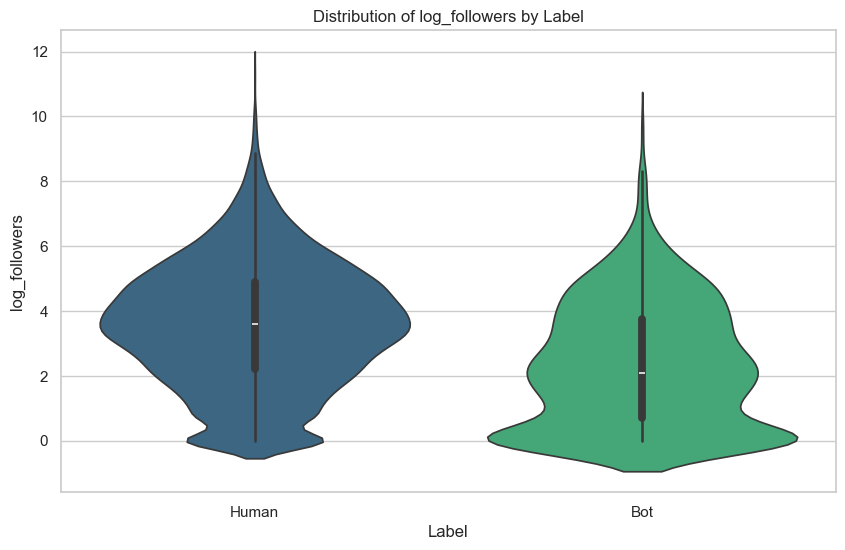

In [20]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('E:\\C\数据工程\\github_bot_processed_data.csv')

df['log_followers'] = np.log1p(df['followers'])

# 绘制小提琴图
plt.figure(figsize=(10, 6))
sns.violinplot(x='label', y='log_followers',hue='label', data=df, palette='viridis')

# 添加标题和标签
plt.title('Distribution of log_followers by Label')
plt.xlabel('Label')
plt.ylabel('log_followers')

# 显示图形
plt.show()

In [19]:
import pandas as pd
from ydata_profiling import ProfileReport

df = pd.read_csv('E:\\C\\数据工程\\github_bot_processed_data.csv')

df['created_at'] = pd.to_datetime(df['created_at'])
df['updated_at'] = pd.to_datetime(df['updated_at'])

# 生成报告
profile = ProfileReport(df, title="你的数据集分析报告", explorative=True)

# 显示报告（在 Jupyter Notebook 或其他支持 IPython Display 的环境中）
profile.to_notebook_iframe()

# 或者，将报告保存为 HTML 文件
profile.to_file("E:\C\数据工程\库报告.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]